In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk6 import rk_error_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, error_samplings, lower_sol, lower_error_samplings) = rk_error_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    lower_computed_solutions = [lower_sol.eval(x) for x in t_eval]
    # plt.plot(t_eval, computed_solutions, label="computed solution")

    actual_solutions = solution(t_eval)
    # plt.plot(t_eval, actual_solutions, label="actual solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    # plt.title(f"actual solution vs interpolated solution tol={tol}")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    lower_error = [abs(lower_computed_solution - actual_solution) for (lower_computed_solution, actual_solution) in zip(lower_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="higher_order")
    plt.plot(t_eval, lower_error, label="lower_order")
    # plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # shape of errors - graphs
    plt.figure()
    for (x_i, x_i_plus_1, hb) in error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of HIGHER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for (x_i, x_i_plus_1, hb) in lower_error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of LOWER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for ((x_i, x_i_plus_1, lower_hb), (_, _, higher_hb)) in zip(lower_error_samplings, error_samplings):
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            lower_hb_eval  = lower_hb.eval(pt)
            higher_hb_eval = higher_hb.eval(pt)
            error = abs(lower_hb_eval - higher_hb_eval)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of ESTIMATED errors between interpolants")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled estimated errors')
    # plt.legend()
    plt.show()

    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 0.5000000000000002, 0.9999999999999996, 0.4999999999999998]
beta values [0.9999999999999996, 1.0, 2.0, 2.0000000000000004, 1.9999999999999991, 1.9999999999999996, 1.0000000000000004, 2.000000000000001]
n_steps 17
n_successful_steps 17


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 0.5000000000000002, 0.9999999999999996, 0.4999999999999998, 1.0000000000000004]
beta values []
n_steps 0
n_successful_steps 0

integration complete
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.83 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.83 - evaluating the first interp


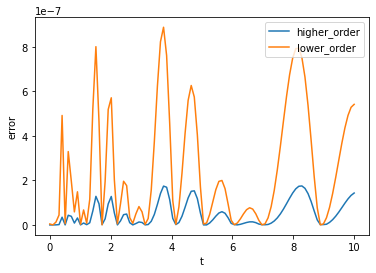

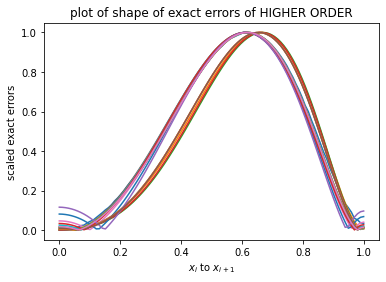

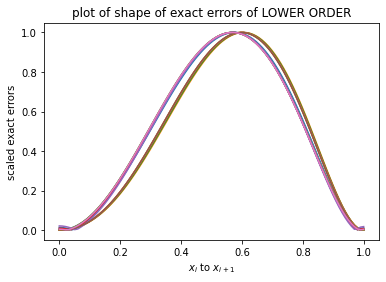

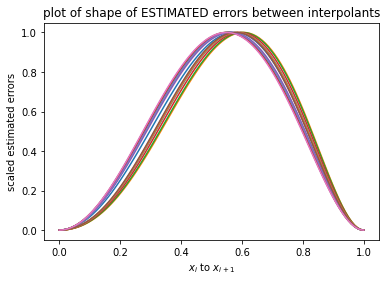

0.0
0.0
0.0
3.1086244689504383e-15
1.2989609388114332e-14
2.9101165921474603e-12
5.100265765278778e-10
5.132295699539213e-10
4.500114725303206e-10
3.874104370638065e-10
1.45231893178277e-09
1.3364014339600772e-09
1.1276204414656377e-09
9.498856146095136e-10
2.263223608522935e-09
1.988817444065205e-09
1.6455695694972405e-09
1.3709511859083534e-09
2.5492775113100663e-09
2.1796079385794087e-09


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 2.0000000000000018, 0.4999999999999999, 1.0000000000000002, 0.49999999999999956, 1.0000000000000009]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.49999999999999956, 2.0000000000000018, 0.9999999999999991]
n_steps 25
n_successful_steps 23


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000002, 2.0000000000000018, 0.49999999999999956, 1.0000000000000009]
beta values []
n_steps 0
n_successful_steps 0

integration complete
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.229999999999999 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.229999999999999 - evaluating the first interp


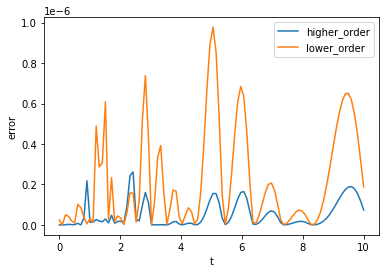

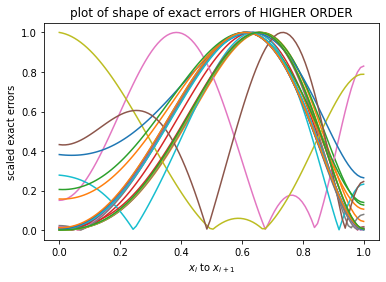

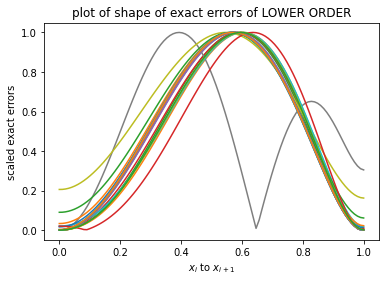

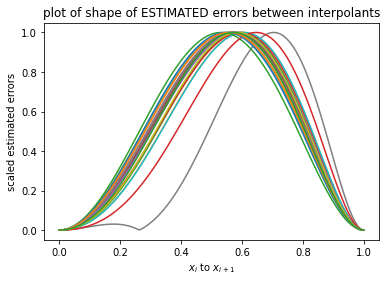

0.0
0.0
0.0
4.551914400963142e-15
9.465761507954085e-13
1.490920720215172e-10
1.7206702729311019e-10
9.58143564488978e-11
2.1554869000794952e-11
1.1865930460430718e-10
1.7287593467862905e-08
1.363000262655234e-08
1.1387733978018844e-08
7.888338315886756e-09
5.2986946497135534e-09
3.6044155993231186e-09
1.407579414136606e-09
5.704192534983221e-10
3.240925583458676e-10
2.120879583067392e-10
1.451277084618674e-10
8.445959764902256e-10
4.1941758399666185e-10
2.1137975050877778e-10
1.1859687537585373e-10
1.305797569031708e-09


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 0.9999999999999998, 1.0000000000000002, 1.0000000000000009]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 1.0000000000000002, 0.9999999999999991, 1.0000000000000018]
n_steps 21
n_successful_steps 15


Monitor6
alpha values [0.5, 1.0, 0.49999999999999994, 0.4999999999999999, 0.5000000000000001, 0.9999999999999998, 1.0000000000000002, 1.0000000000000009, 0.9999999999999981]
beta values []
n_steps 0
n_successful_steps 0

integration complete
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.59 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.59 - evaluating the first interp


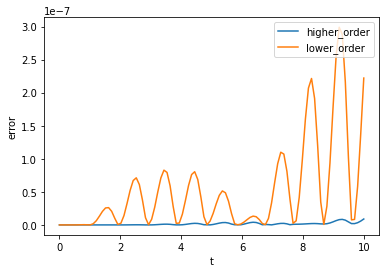

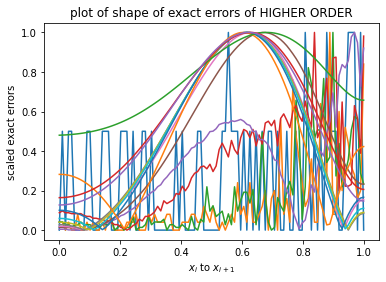

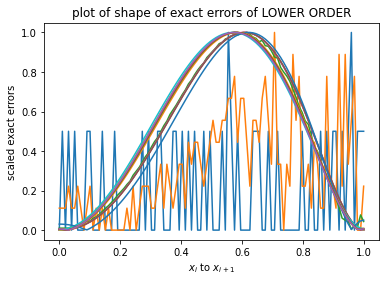

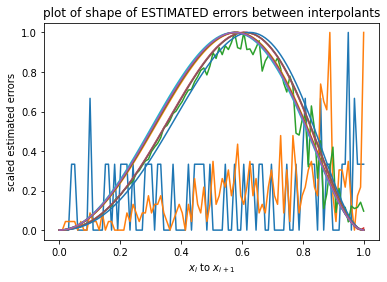

0.0
0.0
0.0
2.220446049250313e-16
6.661338147750939e-16
4.218847493575595e-15
8.881784197001252e-16
2.440270208126094e-13
3.9821479447255115e-12
3.130895542824419e-11
9.618350560458566e-11
2.1609247724541092e-10
4.0508618681656117e-10
6.727995938149434e-10
1.00868113861452e-09
1.3807133214527312e-09
1.73119030222324e-09
1.9957333563525026e-09


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 2.0, 0.5000000000000019, 1.9999999999999982, 2.0000000000000075, 0.4999999999999963, 2.0000000000000147, 0.9999999999999852, 0.5000000000000074, 1.9999999999999705, 2.000000000000059, 0.5000000000000296, 0.4999999999999852, 1.0000000000000295, 1.9999999999998817, 0.9999999999999408]
beta values [0.5, 1.0, 2.0, 1.0000000000000009, 0.5000000000000004, 1.9999999999999927, 1.0000000000000038, 0.49999999999999817, 2.0000000000000147, 0.4999999999999963, 1.0000000000000149, 2.000000000000059, 0.5000000000000074, 0.9999999999999704, 1.9999999999999705, 1.0000000000000593, 1.9999999999998817, 0.4999999999999852, 0.5000000000000296]
n_steps 828
n_successful_steps 527


Monitor6
alpha values [0.5, 1.0, 2.0, 0.9999999999999991, 1.9999999999999982, 0.5000000000000019, 0.9999999999999963, 2.0000000000000075, 0.4999999999999963, 2.0000000000000147, 1.9999999999999705, 2.000000000000059, 0.5000000000000074, 1.9999999999998817, 0.4999999999999852, 1.00

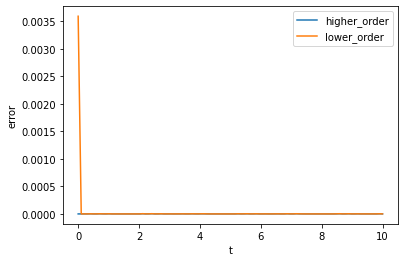

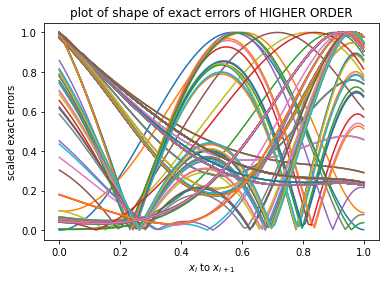

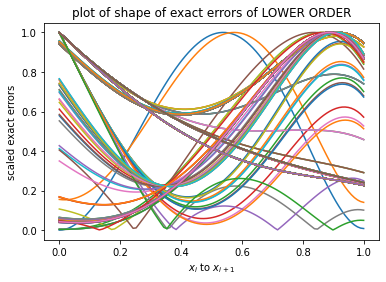

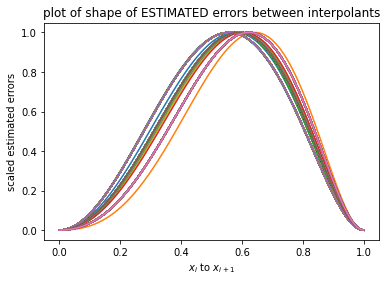

0.0
0.0
0.0
2.1421967116852514e-09
1.9369742060293405e-09
4.054347740312103e-07
5.861267938500614e-07
7.492978388035088e-07
9.106273689829525e-07
1.071062184665461e-06
2.431053713891629e-07
1.2606369183543187e-06
2.8619448783073764e-07
6.907949096079946e-08
1.5482143003175963e-06
3.513963357515415e-07
8.46687397970669e-08
1.8405145548738844e-06
4.176300545388756e-07
1.00465390284743e-07
2.1262175459724197e-06
4.823667811293397e-07
1.1590200371669468e-07
2.4042691915138192e-06
5.453676468203383e-07
1.3092163309025295e-07
2.6736676103089607e-06
6.064058728494359e-07
1.4546986359942338e-07
2.9334438442774058e-06
6.652614679136803e-07
1.5949465947961983e-07
3.1826629267595052e-06
7.217229394118618e-07
1.7294536092116175e-07
3.4204277996607857e-06
7.755868642878028e-07
1.8577363791738577e-07
3.6458827776808533e-06
8.266597315564894e-07
1.979335896296064e-07
3.858216876873044e-06
8.747575070966462e-07
2.093808976200151e-07
4.056665204976717e-06
9.197070118815986e-07
2.200746958003208e-07
4.2

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 2.0, 0.9999999999999991, 0.5000000000000009, 0.9999999999999981, 2.0000000000000147, 0.4999999999999963, 0.5000000000000019, 0.9999999999999963, 1.9999999999999705, 2.000000000000059, 0.5000000000000296, 0.4999999999999852, 1.9999999999999851, 1.9999999999998817, 0.9999999999999408, 0.5000000000000074]
beta values [0.5, 1.0, 2.0, 1.0000000000000004, 1.0000000000000009, 1.9999999999999982, 1.9999999999999962, 1.0000000000000018, 0.4999999999999963, 2.0000000000000147, 1.9999999999999927, 0.5000000000000037, 1.0000000000000038, 0.5000000000000074, 2.000000000000059, 1.9999999999999705, 1.0000000000000593, 1.9999999999998817, 0.4999999999999852, 0.5000000000000296, 0.9999999999999926]
n_steps 492
n_successful_steps 381


Monitor6
alpha values [0.5, 1.0, 2.0, 0.9999999999999991, 0.9999999999999996, 0.5000000000000004, 0.5000000000000009, 0.9999999999999981, 2.0000000000000147, 0.4999999999999963, 0.5000000000000019, 2.000000000000059, 1.000

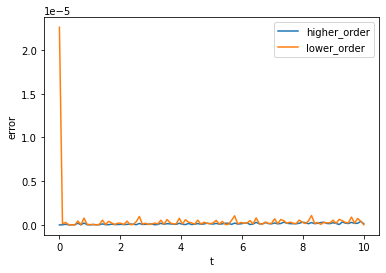

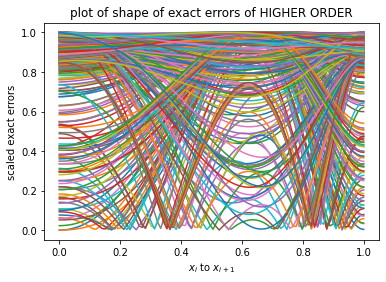

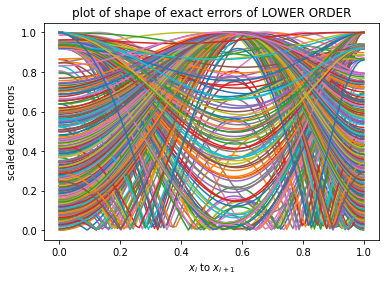

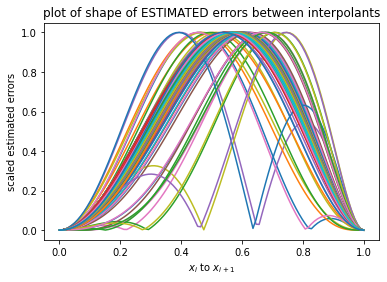

0.0
0.0
0.0
2.4283242083811274e-11
4.26595603286728e-09
6.6936629572467155e-09
7.010022784470493e-09
7.501086862760076e-09
8.2184294925014e-09
9.247096199871407e-09
1.0723884891206126e-08
1.2744040045475913e-08
1.387598547175628e-08
1.5073851944436e-08
1.6229155797020667e-08
1.7188250600597144e-08
1.7806266461306564e-08
1.7938516672089122e-08
1.7452662870454105e-08
1.6460411478291803e-08
1.5256749863468144e-08
1.4045605123413907e-08
1.2916845371080399e-08
1.3431955769860338e-08
1.2410138694463058e-08
1.1299540414455578e-08
1.0429042074378003e-08
9.813330592578495e-09
1.4326647868045939e-08
1.7070138635943977e-08
1.7699452126151982e-08
1.8736495022153576e-08
2.0281013313194762e-08
2.249325858905138e-08
2.561931977673737e-08
2.997301518092854e-08
3.532059245081598e-08
3.834358142107419e-08
4.12231235813465e-08
4.3526269033478115e-08
4.4795980924661194e-08
4.4687454847647246e-08
4.313524559762527e-08
4.054871727277032e-08
3.753743871293125e-08
3.452900187994601e-08
3.1740141848146664e-08


In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000004, 0.9999999999999996]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.9999999999999996, 1.0000000000000004]
n_steps 20
n_successful_steps 19


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000002, 1.0000000000000004, 0.9999999999999996]
beta values []
n_steps 0
n_successful_steps 0

integration complete
ERROR: 0 is outside of the solution range: 0.03 <= x <= 11.19 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.03 <= x <= 11.19 - evaluating the first interp


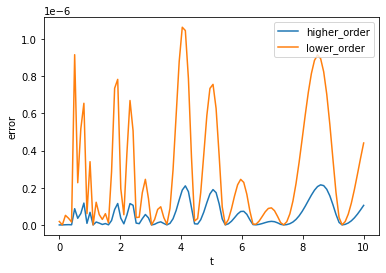

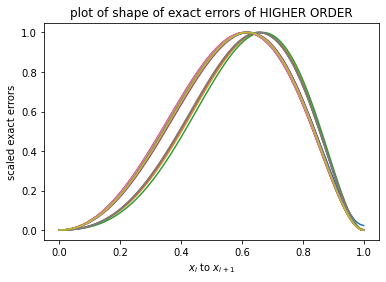

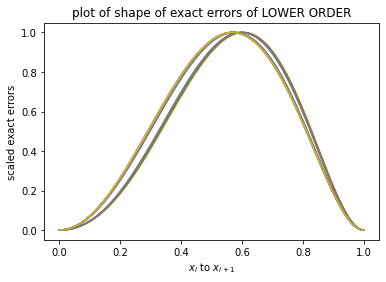

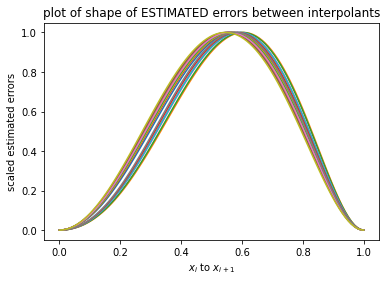

0.0
0.0
0.0
1.0436096431476471e-14
3.9968028886505635e-14
9.614531393253856e-14
9.425793479067579e-14
9.980904991380157e-14
2.48245868306185e-13
2.4819035715495374e-13
2.250977182427505e-13
2.142730437526552e-13
2.1654900095313678e-13
2.4319435354414054e-13
2.514932706532136e-13
2.3905877277741183e-13
2.621514116896151e-13
2.2451485115482228e-13
2.1865842469992458e-13
2.076255833927121e-13
1.6700529847923917e-13
1.5920598173124745e-13


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 2.0, 0.4999999999999999, 0.5000000000000001, 2.0000000000000018, 0.49999999999999956, 0.9999999999999991]
beta values [0.5, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.49999999999999956, 2.0000000000000018, 1.0000000000000009, 1.9999999999999982]
n_steps 34
n_successful_steps 27


Monitor6
alpha values [0.5, 1.0, 2.0, 0.4999999999999999, 0.5000000000000001, 2.0000000000000018, 0.49999999999999956, 0.9999999999999991, 0.5000000000000004]
beta values []
n_steps 0
n_successful_steps 0

integration complete
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.110000000000005 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.110000000000005 - evaluating the first interp


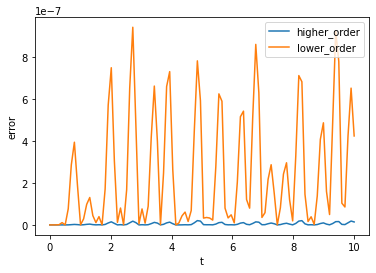

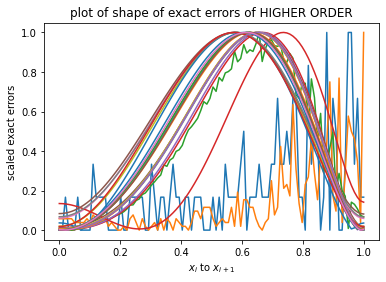

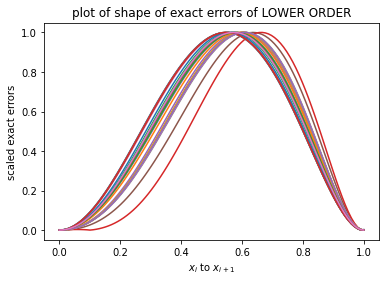

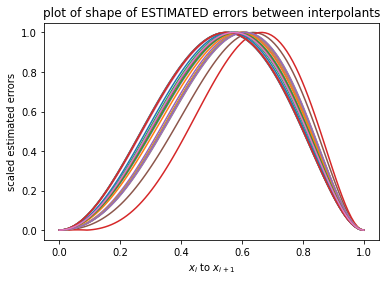

0.0
0.0
0.0
3.3306690738754696e-16
6.661338147750939e-16
2.886579864025407e-15
2.1049828546892968e-13
4.547451304404149e-11
5.714055617556113e-11
5.5722051972573183e-11
2.1743884470737385e-11
2.1008639272679375e-11
3.588807029331065e-11
3.5263902908866385e-11
8.46213099592319e-11
1.1466788629732605e-10
1.204746580274474e-10
1.028594154295348e-10
1.0026590668843482e-10
5.889388976498822e-11
5.7327587121847046e-11
1.3721357383644772e-11
1.9288459718325157e-11
3.5883462867758453e-11
3.455045971545445e-11
1.735595001051138e-11
1.6826706694672566e-11
1.3452683411685484e-11
4.288053245815604e-11
6.493300341858799e-11


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 2.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000004, 0.9999999999999996, 1.0000000000000009, 0.49999999999999956]
beta values [0.5, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.9999999999999996, 1.0000000000000004, 0.9999999999999991, 2.0000000000000018]
n_steps 23
n_successful_steps 21


Monitor6
alpha values [0.5, 1.0, 2.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000004, 0.9999999999999996, 1.0000000000000009, 0.49999999999999956]
beta values []
n_steps 0
n_successful_steps 0

integration complete
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.95 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.95 - evaluating the first interp


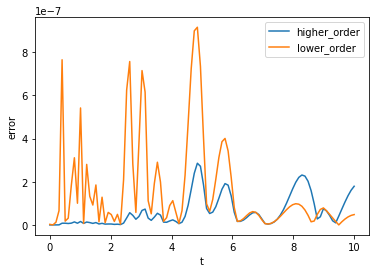

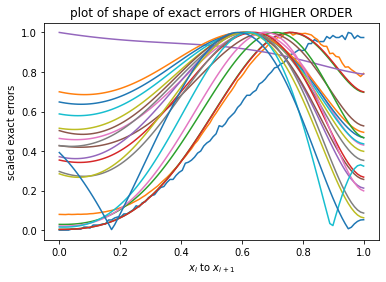

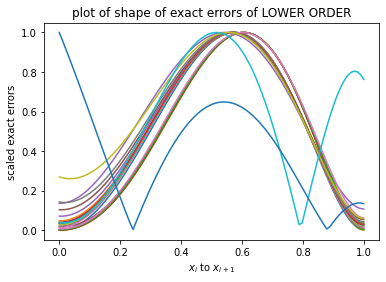

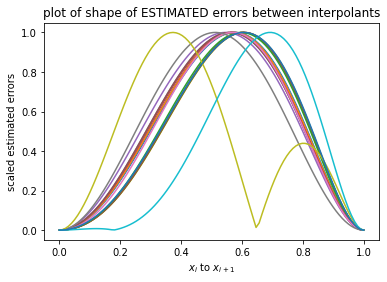

0.0
0.0
0.0
2.1316282072803006e-14
2.0794477251229182e-13
3.7260861063259654e-11
7.720427686042086e-09
6.091028736943116e-09
7.515430167082116e-09
6.968637888959961e-09
5.746432996112105e-09
4.443112877616784e-09
3.298369577464655e-09
2.3807672500097965e-09
1.683134520646945e-09
2.7123556511909896e-08
2.0523200028321753e-08
1.1738266803007491e-08
5.978244788096276e-09
5.734676111757153e-08
1.666941829014945e-08
3.649337276812048e-09
7.490879028182462e-08
1.0025677177338821e-08


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

# t_span_8 = [0, 10]
# eps = 0.1
# a = exp(-1/eps)
# y0_8 = [1, a/(eps*(-1+a))]

# def model8(t, y):
#     return [y[1], y[0]/eps]

# def solution8(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [(1-exp(x/eps)*a)/(1-a) for x in t]

# experiment(model8, y0_8, t_span_8, solution8)

# ## the results were extremely bad. So i wanted to see the solution
# plt.figure()
# plt.plot(t_span_8, solution8(t_span_8))



In [13]:
# Jeff cash test set second one
# t_span_9 = [0, 10]
# eps = 0.1
# y0_9 = [1, -1/sqrt(eps)]

# def model9(t, y):
#     return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

# def solution9(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [exp(-x/sqrt(eps)) for x in t]

# experiment(model9, y0_9, t_span_9, solution9)

In [14]:
# Wolfram Alpha first problem

# t_span_10 = [0, 10]
# y0_10 = [1, 2]

# def model10(t, y):
#     return [y[1], -3*y[0] + 2*cos(4*t)]

# def solution10(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     s = sqrt(3)
#     return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

# experiment(model10, y0_10, t_span_10, solution10)